In [ ]:
import pandas as pd
import numpy as np
import sklearn.tree
import sklearn.metrics
import sklearn.model_selection
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image
from matplotlib import pyplot

pd.set_option('display.max_columns', None)

In [ ]:
#Link to dataset from Kaggle: https://www.kaggle.com/datasets/mojtaba142/hotel-booking
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1OXnjd8PsPRoxnxV6v6rAk1caHHdr9vZG')
og_data = data.copy()
og_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

             name                        email  phone-number       credit_card  
0   Ernest Barnes  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1    Andrea Baker       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2  Rebecca Parker   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3    Laura Murray            Laura_M@gmail.com  364-656-8427  ************5677  
4     Linda Hines           LHines@verizon.com  713

In [ ]:
#locating columns with null values to remove from analysis
og_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Drop columns with a large number of null values
og_data.drop(['country','agent','company'], axis=1, inplace=True)
cleaned_data = og_data

In [ ]:
#Children column has 4 nulls, so we remove those specific entries
rows_to_drop = list(cleaned_data[cleaned_data['children'].isnull()].index)
cleaned_data.drop(labels = rows_to_drop, axis=0, inplace=True)
cleaned_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
cleaned_data.drop(['reservation_status_date', 'reservation_status','name','email','phone-number','credit_card', "arrival_date_month"], axis=1, inplace=True)

In [ ]:
#Determine which columns need to be factorized to convert from categorical to numerical variables for analysis
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   stays_in_weekend_nights         119386 non-null  int64  
 7   stays_in_week_nights            119386 non-null  int64  
 8   adults                          119386 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119386 non-null  int64  
 11  meal                            119386 non-null  object 
 12  market_segment  

#### Using "pd.Factorize" to convert Categorical to Useful Numerical Variables

In [ ]:
cleaned_data['reserved_room_type_container'] = cleaned_data['reserved_room_type']
cleaned_data['assigned_room_type_container'] = cleaned_data['assigned_room_type']

features_to_factorize = ["hotel", "meal","market_segment", 'distribution_channel', 'reserved_room_type',"assigned_room_type",'customer_type']

#Add 1 to values to ignore zero values
counter = 0
for i in features_to_factorize:
  cleaned_data[i] = pd.factorize(cleaned_data[i])[0] + 1
  counter += 1

container_2 = []
for i in range(len(cleaned_data["deposit_type"])):
  if i == "Non Refund":
    container_2 += [1]
  else:
    container_2 += [0]

cleaned_data["deposit_type"] = container_2

In [ ]:
cleaned = cleaned_data
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   stays_in_weekend_nights         119386 non-null  int64  
 7   stays_in_week_nights            119386 non-null  int64  
 8   adults                          119386 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119386 non-null  int64  
 11  meal                            119386 non-null  int64  
 12  market_segment  

### New Feature #1 - "got_room"
- We created an indicator variable 'got_room' to determine whether the guest was assigned the room they requested, as if they did not they are more likely to cancel.

In [ ]:
cleaned['got_room'] = 1 * (cleaned['reserved_room_type'] == cleaned['assigned_room_type'])

cleaned.drop(["reserved_room_type_container","assigned_room_type_container"], axis=1, inplace=True)

### New Feature #2 - "family_size"
- We created a new variable "family_size" since larger families may cancel less often.

In [ ]:
cleaned['family_size'] = cleaned['adults'] + cleaned['children'] + cleaned ["babies"]
cleaned.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0      1            0        342               2015                        27   
1      1            0        737               2015                        27   
2      1            0          7               2015                        27   
3      1            0         13               2015                        27   
4      1            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  meal  market_segment  distribution_channel  \
0       2       0.0       0     1               1                     1   
1       2       0.0       0     1               1                     1   
2       1       0.0       0     1               1                     1   
3       1       0.0       0     1               2                     2   
4       2       0.0       0     1               3                     3   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   reserved_room_type  assigned_room_type  booking_changes  deposit_type  \
0                   1                   1                3             0   
1                   1                   1                4             0   
2                   2                   1                0             0   
3                   2                   2                0             0   
4                   2                   2                0             0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              1   0.0                            0   
1                     0              1   0.0                            0   
2                     0              1  75.0                            0   
3                     0              1  75.0                            0   
4                     0              1  98.0                            0   

   total_of_special_requests  got_room  family_size  
0                          0         1          2.0  
1                          0         1          2.0  
2                          0         0          1.0  
3                          0         1          1.0  
4                          1         1          2.0

In [ ]:
cleaned = cleaned.dropna()

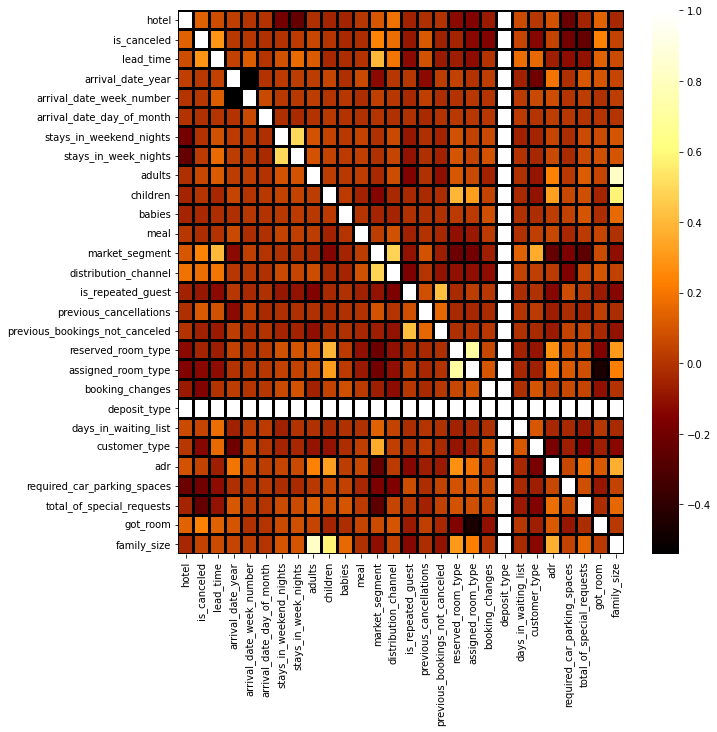

In [ ]:
fig = plt.figure( figsize = ( 10,10))
correlations = cleaned.corr(method = 'pearson')
sns.heatmap(correlations, cmap='afmhot', linecolor='black', linewidths=2)
plt.plot();

In [ ]:
target = 'is_canceled'

# Lets see how many were canceled values we have. Values of 1 respresent a canceled reservation
cancellation_counts = cleaned[target].value_counts()
display(cancellation_counts)

0    75166
1    44220
Name: is_canceled, dtype: int64

In [ ]:
features = list(cleaned.columns)
# Need to remove target from feature list
features.remove('is_canceled')
features

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'got_room',
 'family_size']

# Model #1: Decision Tree Classifier

In [ ]:
cleaned

hotel  is_canceled  lead_time  arrival_date_year  \
0           1            0        342               2015   
1           1            0        737               2015   
2           1            0          7               2015   
3           1            0         13               2015   
4           1            0         14               2015   
...       ...          ...        ...                ...   
119385      2            0         23               2017   
119386      2            0        102               2017   
119387      2            0         34               2017   
119388      2            0        109               2017   
119389      2            0        205               2017   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  meal  market_segment  distribution_channel  is_repeated_guest  \
0            0     1               1                     1                  0   
1            0     1               1                     1                  0   
2            0     1               1                     1                  0   
3            0     1               2                     2                  0   
4            0     1               3                     3                  0   
...        ...   ...             ...                   ...                ...   
119385       0     1               4                     3                  0   
119386       0     1               3                     3                  0   
119387       0     1               3                     3                  0   
119388       0     1               3                     3                  0   
119389       0     3               3                     3                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
...                        ...                             ...   
119385                       0                               0   
119386                       0                               0   
119387                       0                               0

In [ ]:


X_train, X_test= sklearn.model_selection.train_test_split(cleaned, test_size=0.3)

dt = sklearn.tree.DecisionTreeClassifier(random_state=7)
dt.fit(X_train[features], X_train[target])

plt.figure(figsize=[12, 4])
plt.bar(features, dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
X_train

hotel  is_canceled  lead_time  arrival_date_year  \
98936       2            0         22               2016   
50948       2            1        309               2016   
10425       1            1        312               2017   
50816       2            0        142               2016   
112420      2            0         67               2017   
...       ...          ...        ...                ...   
103460      2            0          8               2016   
42504       2            1          0               2015   
45195       2            0         48               2015   
34563       1            0        226               2017   
43402       2            0         74               2015   

        arrival_date_week_number  arrival_date_day_of_month  \
98936                         41                          5   
50948                         20                         12   
10425                         10                          5   
50816                         20                          9   
112420                        21                         22   
...                          ...                        ...   
103460                        52                         24   
42504                         37                          6   
45195                         43                         23   
34563                         12                         25   
43402                         38                         18   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
98936                         0                     2       3       0.0   
50948                         0                     2       2       0.0   
10425                         2                     5       2       0.0   
50816                         1                     2       2       0.0   
112420                        1                     1       1       1.0   
...                         ...                   ...     ...       ...   
103460                        0                     1       2       0.0   
42504                         2                     0       1       0.0   
45195                         0                     1       1       0.0   
34563                         2                     2       2       0.0   
43402                         0                     2       2       0.0   

        babies  meal  market_segment  distribution_channel  is_repeated_guest  \
98936        0     1               4                     3                  0   
50948        0     1               6                     3                  0   
10425        0     1               6                     3                  0   
50816        0     1               3                     3                  0   
112420       0     1               3                     3                  0   
...        ...   ...             ...                   ...                ...   
103460       1     2               1                     1                  0   
42504        0     1               6                     3                  0   
45195        0     1               3                     3                  0   
34563        0     1               3                     3                  0   
43402        0     3               4                     3                  0   

        previous_cancellations  previous_bookings_not_canceled  \
98936                        0                               0   
50948                        0                               0   
10425                        0                               0   
50816                        0                               0   
112420                       0                               0   
...                        ...                             ...   
103460                       0                               0   
42504                        0                               0   
45195                        0                               0

In [ ]:
predicted_train = dt.predict(X_train[features])
predicted_test = dt.predict(X_test[features])

#### Calculating Accuracy of Training Data

In [ ]:
dt.score(X_train[features], X_train[target])

0.9920904630848391

#### Calculating Accuracy of Test Data

In [ ]:
dt.score(X_test[features], X_test[target])

0.8227049363412999

#### Creating Confusion Matrix Values

In [ ]:
cm_train = sklearn.metrics.confusion_matrix(X_train[target], predicted_train)
cm_train

array([[52589,   183],
       [  470, 30328]])

### Calcualting Sensitivity and Specificity

In [ ]:
def SensitivityAndSpecificity(cm):
  # True positives are in the lower-right (row 1, column 1)
  TP = cm[1, 1]
  # True negatives are in the upper-left (row 0, column 0)
  TN = cm[0, 0]
  # False positives are in the upper-right (row 0, columns 1)
  FP = cm[0, 1]
  # False negatives are in the lower-left (row 1, column 0)
  FN = cm[1, 0]
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)
  return {'Sensitivity': sensitivity, 'Specificity': specificity}

## Sensitivity and Specficity of Train Data

In [ ]:
SensitivityAndSpecificity(cm_train)

{'Sensitivity': 0.9847392687836872, 'Specificity': 0.9965322519517926}

## Sensitivity and Specficity of Test Data

In [ ]:
cm_test = sklearn.metrics.confusion_matrix(X_test[target], predicted_test)
SensitivityAndSpecificity(cm_test)

{'Sensitivity': 0.7717180748025629, 'Specificity': 0.8531749575779226}

## Visualization of a Tree with 1 Depth

In [ ]:
def GetDecisionTreeGraphViz(dt):
  return graphviz.Source(sklearn.tree.export_graphviz(
      dt, out_file=None, filled=True, impurity=False,
      feature_names=features,
      class_names=['Not Cancelled', 'Cancelled']))

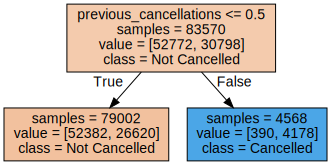

In [ ]:
dt = sklearn.tree.DecisionTreeClassifier(max_depth=1, random_state=7)
dt.fit(X_train[features], X_train[target])
display(GetDecisionTreeGraphViz(dt))

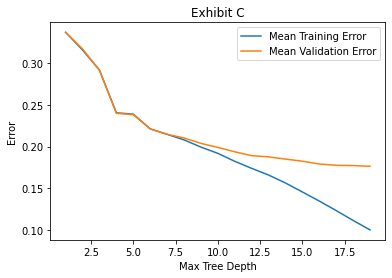

In [ ]:
max_depths = np.arange(1, 20)
n_max_depths = len(max_depths)

n_folds = 10

train_errors = np.zeros([n_max_depths, n_folds])
valid_errors = np.zeros([n_max_depths, n_folds])

fold_index = 0

kf_xval = sklearn.model_selection.KFold(
    n_splits=n_folds, shuffle=True, random_state=7)
for fold_train_index, fold_valid_index in kf_xval.split(X_train[features]):
  
  fold_train = X_train.iloc[fold_train_index]
  fold_valid = X_train.iloc[fold_valid_index]

  for max_depth_index in range(n_max_depths):
    dt = sklearn.tree.DecisionTreeClassifier(
        max_depth=max_depths[max_depth_index], random_state=7)
    dt.fit(fold_train[features], fold_train[target])

    train_errors[max_depth_index, fold_index] = \
        1 - dt.score(fold_train[features], fold_train[target])
    valid_errors[max_depth_index, fold_index] = \
        1 - dt.score(fold_valid[features], fold_valid[target])

  fold_index += 1

mean_train_error = np.mean(train_errors,1)
mean_valid_error = np.mean(valid_errors,1)
  
plt.plot(max_depths, mean_train_error, label='Mean Training Error')
plt.plot(max_depths, mean_valid_error, label='Mean Validation Error')
plt.xlabel('Max Tree Depth')
plt.ylabel('Error')
plt.title('Exhibit C')
plt.legend()
plt.show()

##### We see a tree with depth 15 minimized overfitting and error

##### Let's now evaluate our classifier created using optimal depth.

In [ ]:
dt = sklearn.tree.DecisionTreeClassifier(
      random_state=7, max_depth=15)
dt.fit(X_train[features], X_train[target])

DecisionTreeClassifier(max_depth=15, random_state=7)

In [ ]:
display(GetDecisionTreeGraphViz(dt))

In [ ]:
plt.figure(figsize=[12, 4])
plt.bar(features, dt.feature_importances_)
plt.title('Exhibit B')
plt.xticks(rotation=90)
plt.show()

### Computing Predicitons

In [ ]:
predicted_train = dt.predict(X_train[features])
predicted_test = dt.predict(X_test[features])

### Training Data

In [ ]:
cm_train = sklearn.metrics.confusion_matrix(X_train[target], predicted_train)
SensitivityAndSpecificity(cm_train)

{'Sensitivity': 0.7329047340736411, 'Specificity': 0.9215114075646176}

### Test Data

In [ ]:
cm_test = sklearn.metrics.confusion_matrix(X_test[target], predicted_test)
SensitivityAndSpecificity(cm_test)

{'Sensitivity': 0.6967665027566682, 'Specificity': 0.8933196391890685}

In [ ]:
accuracy = (199915 + 9534) / (199915 + 9534 + 3796 + 2571)
accuracy

0.9704980168291507

### Neural Network Model - MLP Classifier

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

import numpy as np


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
import tensorflow as tf

In [ ]:
X_train, X_test = sklearn.model_selection.train_test_split(cleaned, test_size=0.3)

In [ ]:
X_train_copy = X_train.copy()
X_train_1 = X_train_copy.drop(['is_canceled'], axis = 1)
Y_train = X_train['is_canceled']
X_test_copy = X_test.copy()
X_test_1 = X_test_copy.drop(['is_canceled'], axis = 1)
Y_test = X_test['is_canceled']

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation = 'identity', max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10, batch_size = 256, random_state=42)

mlp.fit(X_train_1, Y_train)
train_pred = mlp.predict(X_train_1)
accuracy_score(Y_train, train_pred)


Iteration 1, loss = 1.38333412
Iteration 2, loss = 0.73319714
Iteration 3, loss = 0.71760841
Iteration 4, loss = 0.77051238
Iteration 5, loss = 0.73712559
Iteration 6, loss = 0.73143877
Iteration 7, loss = 0.70164813
Iteration 8, loss = 0.61110899
Iteration 9, loss = 0.73714934
Iteration 10, loss = 0.67005721
Iteration 11, loss = 0.67017107
Iteration 12, loss = 0.76304993
Iteration 13, loss = 0.65229480
Iteration 14, loss = 0.70941917
Iteration 15, loss = 0.73354260
Iteration 16, loss = 0.95980658
Iteration 17, loss = 0.69030365
Iteration 18, loss = 0.69066459
Iteration 19, loss = 0.70805154
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.6619480674883331

In [ ]:
X_test_copy = X_test.copy()
X_test_1 = X_test_copy.drop(['is_canceled'], axis = 1)
Y_test = X_test['is_canceled']

test_pred = mlp.predict(X_test_1)
accuracy_score(Y_test, test_pred)

0.6623576055394237

In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
score_acc = make_scorer(accuracy_score)

In [ ]:
Y_train.isnull().sum()

0

In [ ]:
def hyper_optimizer(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD' :SGD(lr=learning_rate)
                 }
    activationL = ['identity', 'logistic', 'relu', 'softmax', 'tanh']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train_1, Y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score


In [ ]:

parameter_space ={
    'neurons': (10, 100),
    'activation':(0, 4),
    'optimizer':(0,1),
    'learning_rate':(0.01, 1),
    'batch_size':(64, 512),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(hyper_optimizer, parameter_space, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | nan       | 2.449     | 139.7     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 31.48     | 0.3377    | 0.9907    |
| 2         | nan       | 0.9509    | 100.4     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 91.07     | 0.794     | 0.8406    |
| 3         | nan       | 3.261     | 507.9     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 83.55     | 0.6977    | 0.5653    |
| 4         | nan       | 1.097     | 511.3     | 0.138     | 0.1846    | 58.8      | 1.81      | 2.456     | 0.3296    | 46.05     | 0.319     | 0.9472    |
| 5         | nan       | 3.675     | 428.6     | 0.

ValueError: ignored

In [ ]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['identity', 'logistic', 'relu', 'softmax', 'tanh']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'relu',
 'batch_size': 140,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 44,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.42602224734191213,
 'neurons': 31,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.optimizers.optimizer_v2.gradient_descent.SGD at 0x7f249bfc2880>}

In [ ]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(100,), activation = 'relu', max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10, batch_size = 140, random_state=42)

mlp_2.fit(X_train_1, Y_train)
train_pred = mlp_2.predict(X_train_1)
accuracy_score(Y_train, train_pred)

Iteration 1, loss = 0.84536307
Iteration 2, loss = 0.59551568
Iteration 3, loss = 0.58324031
Iteration 4, loss = 0.59250080
Iteration 5, loss = 0.56722026
Iteration 6, loss = 0.57214928
Iteration 7, loss = 0.58067508
Iteration 8, loss = 0.57321800
Iteration 9, loss = 0.56013562
Iteration 10, loss = 0.56015319
Iteration 11, loss = 0.57659418
Iteration 12, loss = 0.56891307
Iteration 13, loss = 0.57907764
Iteration 14, loss = 0.56762761
Iteration 15, loss = 0.55927611
Iteration 16, loss = 0.58490438
Iteration 17, loss = 0.59441213
Iteration 18, loss = 0.57097586
Iteration 19, loss = 0.56346867
Iteration 20, loss = 0.57499108
Iteration 21, loss = 0.53230824
Iteration 22, loss = 0.55625048
Iteration 23, loss = 0.55863185
Iteration 24, loss = 0.55154798
Iteration 25, loss = 0.59742604
Iteration 26, loss = 0.55420358
Iteration 27, loss = 0.53596947
Iteration 28, loss = 0.53276259
Iteration 29, loss = 0.55851243
Iteration 30, loss = 0.54940070
Iteration 31, loss = 0.53288636
Iteration 32, los

0.79290415220773

In [ ]:

test_pred = mlp_2.predict(X_test_1)
accuracy_score(Y_test, test_pred)

0.789004914004914

In [ ]:
cm_train = sklearn.metrics.confusion_matrix(X_train[target], train_pred)
SensitivityAndSpecificity(cm_train)

{'Sensitivity': 0.5576960309777348, 'Specificity': 0.9315329022441993}

In [ ]:
cm_test = sklearn.metrics.confusion_matrix(X_test[target], test_pred)
SensitivityAndSpecificity(cm_test)

{'Sensitivity': 0.5506424792139077, 'Specificity': 0.9286283538475162}